<a href="https://colab.research.google.com/github/JAYDEEPDAS33/SNA-Analysis/blob/main/Final_year_poject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of nodes: 61
Number of edges: 270
Graph is directed: False
Degree: [('881', 6), ('858', 4), ('828', 19), ('697', 17), ('884', 3), ('864', 4), ('856', 29), ('869', 6), ('889', 12), ('872', 6), ('873', 5), ('719', 16), ('713', 15), ('861', 9), ('863', 10), ('840', 13), ('803', 3), ('745', 11), ('805', 16), ('865', 3), ('857', 4), ('874', 6), ('708', 17), ('823', 18), ('885', 8), ('870', 6), ('871', 6), ('888', 8), ('825', 4), ('774', 17), ('729', 11), ('769', 12), ('800', 16), ('819', 15), ('859', 1), ('876', 10), ('887', 5), ('895', 5), ('890', 6), ('810', 10), ('879', 5), ('753', 11), ('830', 14), ('747', 21), ('776', 7), ('772', 7), ('804', 11), ('886', 7), ('893', 3), ('811', 7), ('867', 7), ('868', 3), ('878', 9), ('877', 3), ('882', 7), ('894', 3), ('866', 4), ('880', 7), ('703', 8), ('798', 1), ('862', 3)]
Clustering coefficient: {'881': 0.6666666666666666, '858': 1.0, '828': 0.6549707602339181, '697': 0.6470588235294118, '884': 0.6666666666666666, '864': 0.6666666666666666

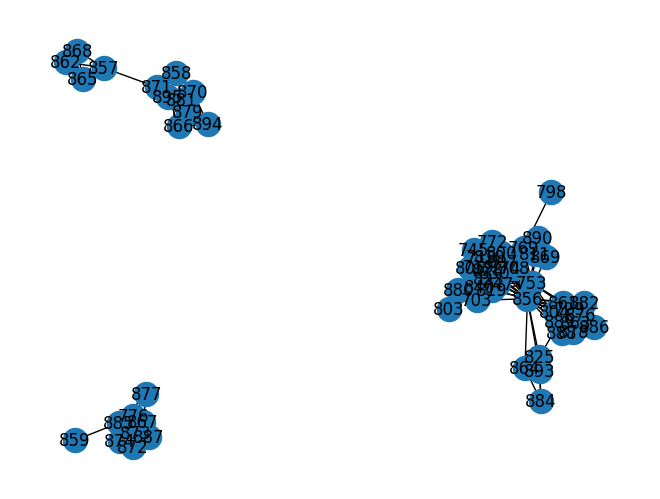

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.read_edgelist('698.edges')
# Instead of nx.info(G), access Graph properties directly:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# To get more information about the graph, you can use:
print(f"Graph is directed: {G.is_directed()}")
# To get a dictionary of degrees
print(f"Degree: {G.degree()}")
# To get all clustering coefficients
print(f"Clustering coefficient: {nx.clustering(G)}")
# avg clustering coeff
print(f"Average clustering coefficient: {nx.average_clustering(G)}")
# To find if graph is connected
print(f"Graph is connected: {nx.is_connected(G)}")

nx.draw(G, with_labels=True)
plt.show()

In [ ]:
import itertools
t1=(4,5)
t2=(5,4)
k=4
l=5
t3=(k,l)
print(t1==t3)
t=[8,9,6,4,6,8]
print(list(itertools.combinations(t,3)))
for i in t:
  if i%3==0:
    t.remove(i)
print(t)

True
[(8, 9, 6), (8, 9, 4), (8, 9, 6), (8, 9, 8), (8, 6, 4), (8, 6, 6), (8, 6, 8), (8, 4, 6), (8, 4, 8), (8, 6, 8), (9, 6, 4), (9, 6, 6), (9, 6, 8), (9, 4, 6), (9, 4, 8), (9, 6, 8), (6, 4, 6), (6, 4, 8), (6, 6, 8), (4, 6, 8)]
[8, 4, 6, 8]


-- {'236': 0.5261453821401748, '186': 0.22199546361351719, '122': 0.8504443169136207, '285': 0.0031939498425134216, '24': 0.25686477069549773, '346': 0.10305598659954418, '271': 0.05613954102623164, '304': 0.9335250777298149, '176': 0.8471789214145589, '9': 0.7174561983629539, '130': 0.1273282977877469, '329': 0.6468206781139252, '204': 0.6667563418819954, '213': 0.48178634708755386, '252': 0.43581268897000947, '332': 0.08930113049057842, '82': 0.8496495244173435, '65': 0.7755968192283035, '276': 0.43811051976751303, '26': 0.32550774448605957, '280': 0.5330445704926061, '272': 0.09333102852184871, '211': 0.2799022644368163, '199': 0.7446491319390586, '84': 0.5380979281677433, '133': 0.2794587492433255, '62': 0.8465105655045493, '239': 0.42633643702327484, '172': 0.24794687974585705, '322': 0.047230133912743444, '53': 0.6094073046361971, '3': 0.6155167645223956, '170': 0.5842128665770077, '175': 0.8246152358168858, '46': 0.6121076116798266, '56': 0.2541759843310756, '254': 0.15853795022

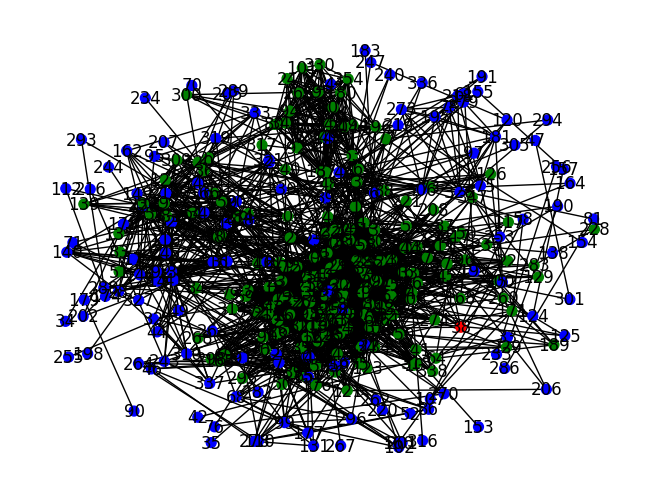

In [11]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('0.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    n = G.number_of_nodes()
    if cov1 < n/1.7 and cov2 <n/1.7 and cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")
  temp = list(sorted_dict.keys())[-1]
  last_key,last_value = temp,sorted_dict[temp]
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'
  for i in set(node1).intersection(set(node2)):
    color_map[i]='green'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()




-- {'953': 0.8506520585037733, '1323': 0.7282478814199059, '1789': 0.6354237076345096, '1707': 0.6730578954053363, '1175': 0.2627972451962741, '1059': 0.5299752971554571, '1329': 0.19599097667915422, '1559': 0.09468201800027964, '1804': 0.5747416814151787, '1898': 0.5624340051270184, '1622': 0.2903239644468387, '1520': 0.5305497313500507, '1200': 0.7084510780994878, '1202': 0.5679219212311271, '1449': 0.9073080786405253, '1836': 0.8216068675297379, '1156': 0.8431362216699747, '1605': 0.5774936750668206, '1149': 0.6542721423318582, '1173': 0.5373176392392035, '1180': 0.01782071986627798, '1549': 0.2174064835715187, '1412': 0.8804446143319412, '1638': 0.624303167540376, '942': 0.9299376145590028, '1448': 0.043682661385259225, '1786': 0.740533440276417, '1768': 0.2504472770886199, '1092': 0.2537442050249624, '927': 0.5246258343629134, '1791': 0.35542397006421034, '1287': 0.8472329060598025, '1516': 0.7511653709018614, '1044': 0.28338876240312016, '1235': 0.22827219866992476, '1100': 0.456

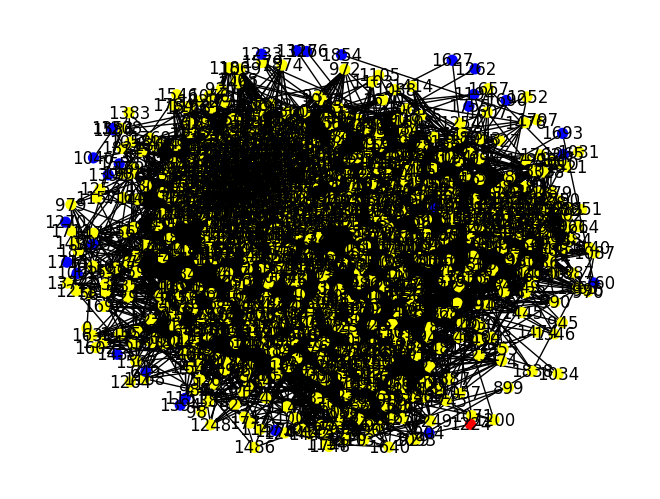

In [12]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('107.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    if cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  '''for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")'''
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()


-- {'2849': 0.22574494690842306, '3021': 0.7545928893856686, '2694': 0.06787049308942483, '3096': 0.8402037442622404, '2818': 0.6762445684470084, '2725': 0.38381796179295313, '2951': 0.23885892295133782, '3285': 0.28730829305225813, '3082': 0.9298232855621189, '2832': 0.6116788194322738, '2960': 0.20833205128751242, '2800': 0.21399509804026795, '2929': 0.8191226345234475, '3029': 0.5972923879475909, '2909': 0.11866076549301918, '2880': 0.7080860953525273, '2754': 0.8827735090415781, '2872': 0.08811199036160566, '3232': 0.14775284846726322, '3184': 0.601048767127573, '2948': 0.1838929325258396, '3277': 0.3359832586146012, '3297': 0.3311701845300006, '2925': 0.5199436874290656, '3397': 0.37579953386502774, '2939': 0.9218263068225139, '3185': 0.32202094575706397, '3115': 0.30140311169873346, '2927': 0.5112978056244606, '3426': 0.8831354384978242, '3333': 0.9920263143433231, '3394': 0.7691311883492451, '3087': 0.03525851233729371, '3236': 0.11524197327291197, '3327': 0.24825457941324292, '

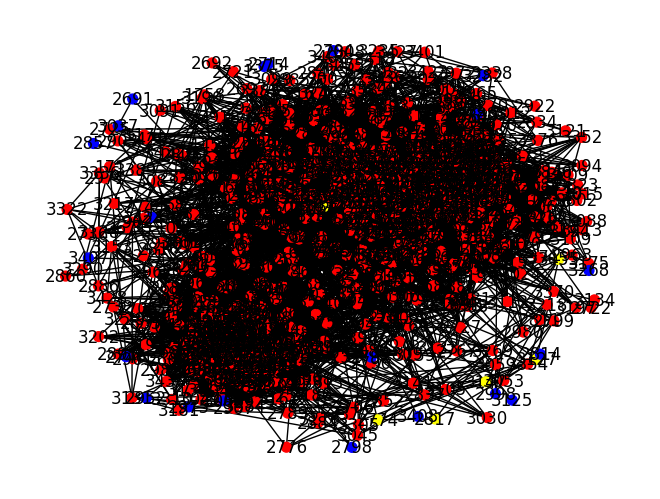

In [ ]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('1684.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    if cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  '''for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")'''
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()


-- {'2290': 0.14971276645968046, '2363': 0.3854462317864841, '2346': 0.24385287676446465, '2025': 0.1381499446076927, '2140': 0.40570319778554653, '2428': 0.3268143068022634, '2201': 0.1874547910757648, '2506': 0.716162450009434, '2425': 0.08961852338008669, '2557': 0.8989603444132994, '2532': 0.08664895694409269, '2073': 0.3198746728225107, '2278': 0.2037808134435375, '2551': 0.96639880682051, '2077': 0.8616187330418698, '2369': 0.4401592935239439, '1465': 0.3073041634989282, '2592': 0.9340058711592512, '2046': 0.9702859228079382, '1941': 0.9505402855325907, '2518': 0.2619563901091805, '2132': 0.5727577198211021, '2650': 0.5473390516607128, '2207': 0.060885214074306804, '2553': 0.44856627198654175, '2078': 0.014290669770245734, '2203': 0.24793802482119354, '2143': 0.31602548838630395, '2224': 0.282423011332643, '2510': 0.40449591830886944, '2240': 0.7099273101906052, '2563': 0.5519172093073336, '2122': 0.8019202778655199, '2118': 0.23758627717122838, '1944': 0.2848304846138049, '2117'

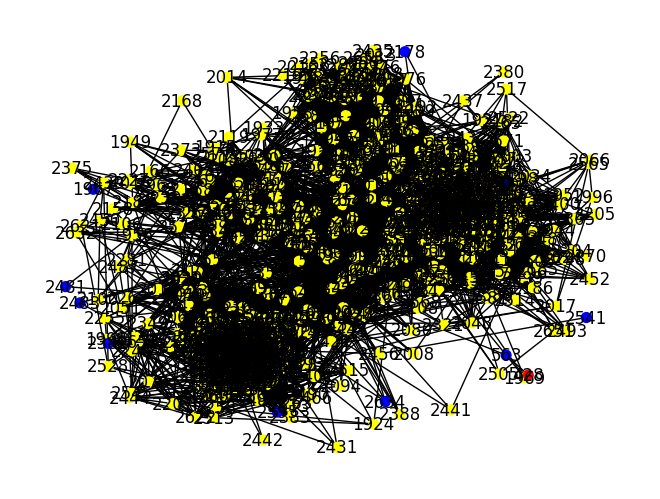

In [1]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('1912.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    if cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  '''for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")'''
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()


-- {'3825': 0.295857906041493, '3568': 0.7480886987114833, '3549': 0.11384087132786147, '3905': 0.20836032111991887, '3750': 0.9978614913624447, '3596': 0.5593973368249262, '3710': 0.5704193302750774, '3713': 0.6258830001384923, '3611': 0.767262508228962, '3542': 0.49527082580659454, '3726': 0.2157138716848892, '3972': 0.9881945321019788, '3633': 0.11561205352289972, '3448': 0.3719154104207527, '3550': 0.1554680630778168, '3968': 0.44208086244540934, '1085': 0.7358330406726669, '3721': 0.31765279198053187, '3623': 0.6375606015267709, '3866': 0.833081759155181, '3640': 0.03736308469208993, '3800': 0.2669114548871282, '3762': 0.39019387371031933, '3559': 0.003334268208125657, '3609': 0.17603606466645838, '3495': 0.302304847964735, '3793': 0.014605557504677513, '3951': 0.4105768464962758, '3873': 0.7819421374280243, '3471': 0.019851270906493523, '3851': 0.4388067945116064, '3780': 0.14456246036987808, '3576': 0.7324255569127631, '3707': 0.3841128873088663, '3500': 0.1850730320751407, '361

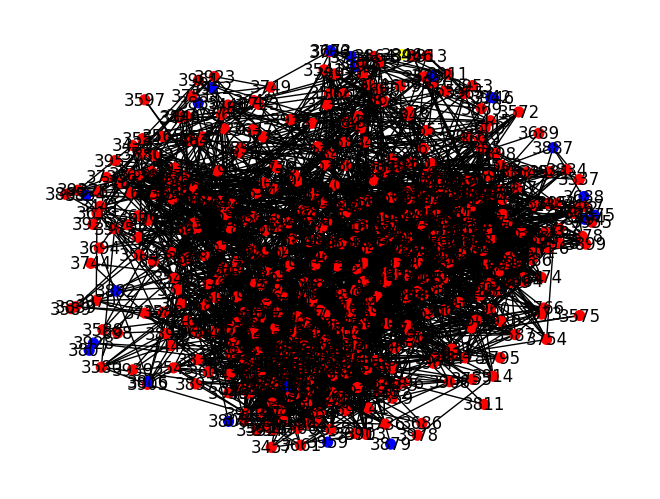

In [2]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('3437.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    if cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  '''for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")'''
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()


-- {'436': 0.5927829143350213, '428': 0.01905232719787253, '450': 0.7908419616734758, '531': 0.5842261542598892, '538': 0.4214901795215714, '404': 0.18908144244972724, '565': 0.17147658335338156, '412': 0.3996793368225603, '471': 0.22788319671590085, '461': 0.9567154121163727, '544': 0.5365164047798466, '414': 0.3243049023655288, '465': 0.44896294361236655, '546': 0.25285175010267946, '547': 0.5012822873626015, '475': 0.05051626573703827, '446': 0.6774431240807685, '536': 0.8727162822955172, '398': 0.8982084624391159, '367': 0.9513110377162292, '452': 0.32548665707409485, '560': 0.5050369964003123, '493': 0.2725446714372237, '361': 0.10750043295869993, '359': 0.1943331521104983, '402': 0.6573941367450353, '520': 0.8317495682431676, '567': 0.6202486257622767, '542': 0.709315371355427, '510': 0.5397563137819668, '521': 0.7282649337804772, '559': 0.3478692091039678, '557': 0.14939592805412938, '376': 0.31169215406490103, '555': 0.2993319041679212, '500': 0.9144545129213206, '469': 0.18536

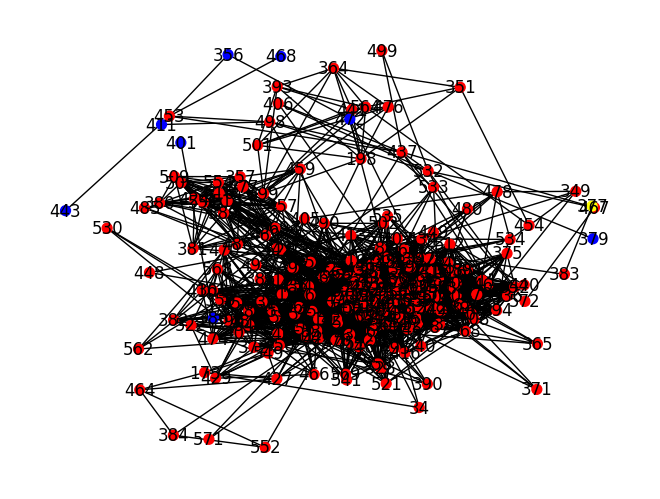

In [3]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('348.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    if cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  '''for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")'''
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()


-- {'4038': 0.4822290741566434, '4014': 0.8429210621116471, '4032': 0.6245711162104907, '4027': 0.33926914990730817, '4019': 0.6555767931712183, '4026': 0.936991323246159, '4023': 0.9739976776857177, '4003': 0.9514107431151897, '4018': 0.2531523154245695, '3997': 0.5780024868630536, '4031': 0.9847081599461488, '4021': 0.376033443689213, '3998': 0.6665658315219516, '4013': 0.29561114477510486, '4004': 0.39946013979695805, '4030': 0.23618448623529364, '3988': 0.9791602061272311, '3982': 0.6723307791580986, '4002': 0.45099079348589866, '4037': 0.2153178270448054, '4020': 0.20426277132078474, '3995': 0.16328836285464998, '3993': 0.0997149189318105, '3986': 0.05362082200622109, '4017': 0.00976391959732692, '3983': 0.20261331658744075, '3994': 0.39489643019204423, '3999': 0.8626391577413893, '4005': 0.20415962038777358, '4009': 0.8736438070938792, '3991': 0.9416015289057305, '3989': 0.6382196296006356, '4011': 0.011430844400019069, '3992': 0.688774435735439, '3981': 0.6578950679180849, '4000

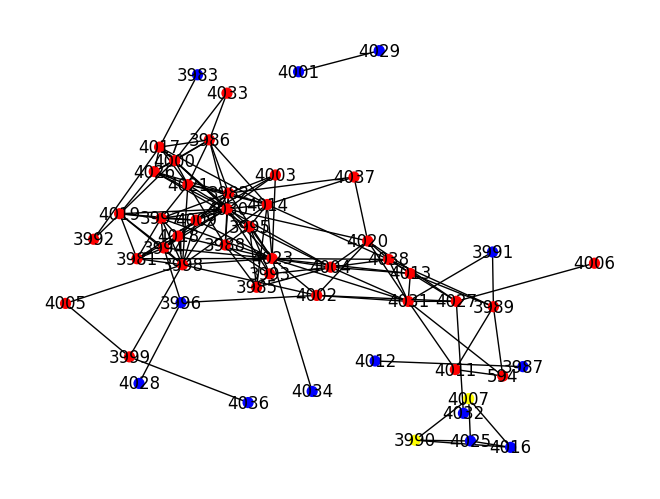

In [8]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('3980.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    if cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  '''for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")'''
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()


-- {'650': 0.25779397730700826, '647': 0.3593836417112035, '461': 0.18181928829829863, '544': 0.6595699575920057, '614': 0.6964728553837485, '515': 0.16571924549334616, '363': 0.41566299143724084, '348': 0.4353766514009654, '436': 0.1285901060119483, '428': 0.38386438196031536, '400': 0.4417384216550857, '591': 0.05468224247496667, '636': 0.4526352033057419, '630': 0.36635030384393885, '500': 0.6970189301211799, '524': 0.4212257630213275, '553': 0.12525318079137504, '561': 0.9189850287410996, '651': 0.4420687782501441, '597': 0.37783538415459084, '619': 0.6121285806902553, '664': 0.8689986405029669, '666': 0.6266442949793937, '606': 0.543459171187758, '438': 0.3152727239481029, '370': 0.578199727357722, '556': 0.6188369575191572, '373': 0.7783326960463165, '665': 0.9047990164554425, '583': 0.2916671216937341, '633': 0.5881674864754866, '680': 0.5614724695378871, '434': 0.10134535928971466, '566': 0.5858216431206426, '604': 0.07144930913575376, '683': 0.5724284400332526, '609': 0.844867

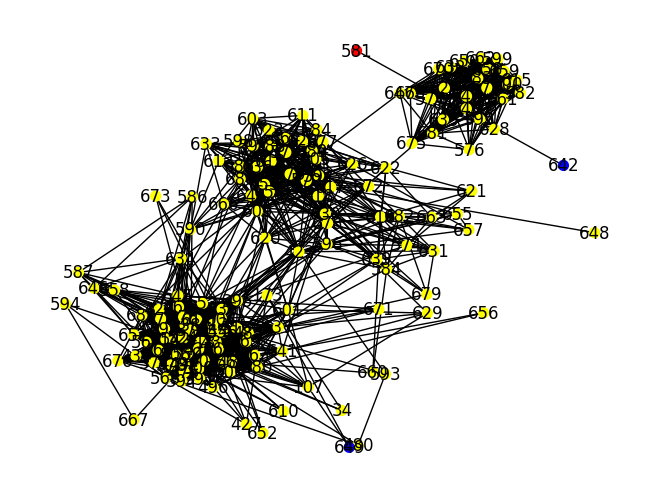

In [13]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('414.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    if cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  '''for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")'''
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()


-- {'827': 0.22730287712528652, '819': 0.9611737041103084, '830': 0.8704759229307758, '826': 0.5079437533186837, '828': 0.8069635556289521, '752': 0.3862947599548511, '756': 0.5897000378567389, '694': 0.42489946112006605, '728': 0.3614602105982908, '821': 0.9867369790826621, '701': 0.8581067869949079, '724': 0.180816083221655, '708': 0.5758903055346659, '842': 0.5128673753561597, '719': 0.9445539242459456, '713': 0.48625224112701926, '764': 0.6857005751638713, '783': 0.6694454518949072, '831': 0.22022364020015794, '820': 0.30418064272031475, '829': 0.5057059542669334, '696': 0.20062276760571007, '697': 0.27813294934530663, '849': 0.8561475716725883, '840': 0.07557690968216535, '803': 0.0022881443003770485, '774': 0.12751937888838227, '810': 0.6217888370336847, '710': 0.7418422090419645, '823': 0.23913672111315176, '835': 0.22803967624142885, '779': 0.9005733934613614, '747': 0.060762478405440024, '739': 0.022997570471176565, '787': 0.4680347386412681, '748': 0.657778897175481, '722': 0

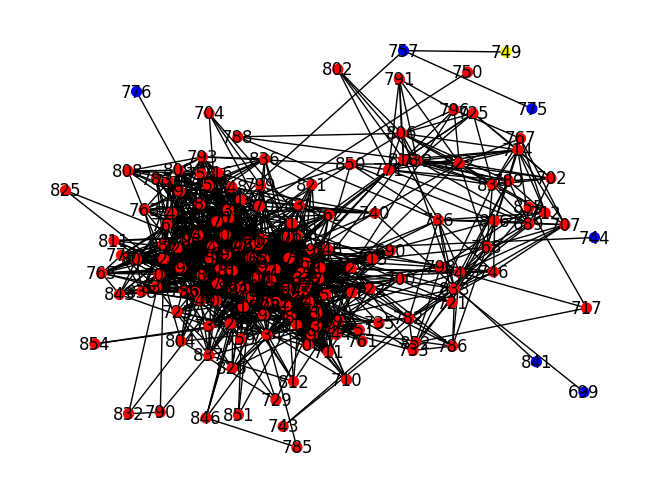

In [9]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('686.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    if cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  '''for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")'''
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()


-- {'881': 0.8686529835704203, '858': 0.9404701862077782, '828': 0.7895958184100672, '697': 0.3518264108515361, '884': 0.448231925052758, '864': 0.436428688611869, '856': 0.9910543201830442, '869': 0.7577365133086004, '889': 0.8469245560100263, '872': 0.14179433686528975, '873': 0.662604228352263, '719': 0.29261849422145525, '713': 0.015482989231811684, '861': 0.23447583595010413, '863': 0.010807602868500688, '840': 0.33621770552911934, '803': 0.15603661067898322, '745': 0.5145330031864791, '805': 0.836448247327942, '865': 0.553510220032152, '857': 0.5814282617560249, '874': 0.4355525642976479, '708': 0.17974309043647507, '823': 0.8770223709241078, '885': 0.6262638419838646, '870': 0.5894786147354363, '871': 0.36253057418262036, '888': 0.6778912687192195, '825': 0.0920231185392486, '774': 0.5662699209267399, '729': 0.10010882319852565, '769': 0.14785695429353707, '800': 0.0886608880241112, '819': 0.13132615062822606, '859': 0.5893302999671466, '876': 0.07959909796193332, '887': 0.00639

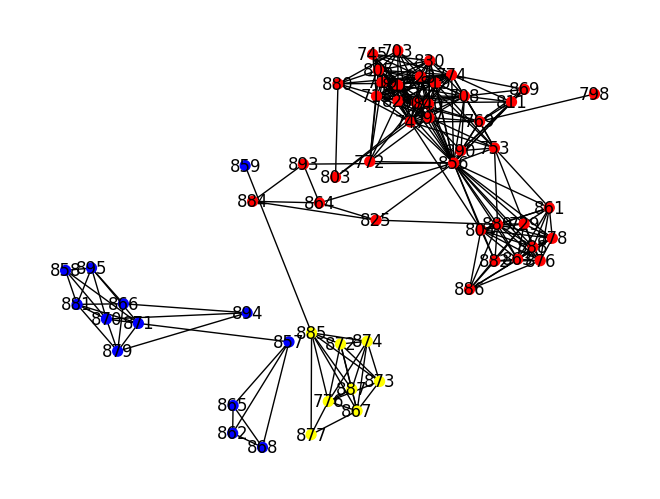

In [10]:
from math import inf
import itertools
import networkx as nx
import random
import matplotlib.pyplot as plt

G=nx.read_edgelist('698.edges')
G_nodes=list(G.nodes())
color_map={i:"blue" for i in G_nodes}
influence={i:0 for i in G_nodes}

def sortByValue(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

dc=nx.degree_centrality(G)
bc=nx.betweenness_centrality(G)
cc=nx.closeness_centrality(G)
ec=nx.eigenvector_centrality(G)

dc=sortByValue(dc)
bc=sortByValue(bc)
cc=sortByValue(cc)
ec=sortByValue(ec)

dc_lst=list(dc)
bc_lst=list(bc)
cc_lst=list(cc)
ec_lst=list(ec)

dc_4=dc_lst[:4]
bc_4=bc_lst[:4]
cc_4=cc_lst[:4]
ec_4=ec_lst[:4]

# Start calculate embededness
def calc_embededness():
  embededness={}
  for i in G.edges():
    #print(type(i))
    neighbourA=set(G.neighbors(i[0]))
    neighbourB=set(G.neighbors(i[1]))
    #print(neighbourA,neighbourB)
    AUB=(neighbourA).union(neighbourB)
    comn=(neighbourA).intersection(neighbourB)
    embededness[i]=len(comn)/len(AUB)
    #embededness[i]=1-(len(AUB)/(len(neighbourA)+len(neighbourB)))
    embededness[(i[1],i[0])]=embededness[i]
  return embededness
# End calculate embededness


embededness=calc_embededness()
# Start calculate influence
def calc_coverage():
  base_inf={i:0 for i in G_nodes}
  threshold={i:random.random() for i in G_nodes}
  print("--",threshold)
  influenced=[]
  #inf={i:0 for i in G_nodes}
  covered={i:[] for i in G_nodes}
  for i in G_nodes:
    influenced.append(i)
    covered[i].append(i)
    while influenced!=[]:
      #print(influenced,"at start")
      for j in influenced:
        for k in G.neighbors(j):
          base_inf[k]+=embededness[(j,k)]/5
          #random.random()>=0.8
          if k not in covered[i] and base_inf[k]>=threshold[k]:
            #print(k,"influenced by",j)
            influenced.append(k)
            covered[i].append(k)
        influenced.remove(j)
      #print(influenced,"after remove")
    #inf[i]=len(covered[i])/len(G_nodes)
  return covered
# End calculate coverage

# Start of calc infuence
def calc_infl(covered={}):
  inf={i:0 for i in G_nodes}
  if covered=={}:
    covered=calc_coverage()
  '''for i in covered:
    print(i,":",len(covered[i]))'''
  all_comb=list(itertools.combinations(G_nodes,2))
  all_int_uni={}
  for i in all_comb:
    twoThird=(int)(G.number_of_nodes()*3/2)
    half=(int)(G.number_of_nodes()/1.5)
    cov1=len(covered[i[0]])
    cov2=len(covered[i[1]])
    #print(i,":",len(covered[i[0]]),len(covered[i[1]]),end="")
    if cov1+cov2<twoThird and cov1+cov2>half:
      all_int_uni[i]=[len(set(covered[i[0]]).intersection(set(covered[i[1]])))/len(G_nodes),len(set(covered[i[0]]).union(set(covered[i[1]])))/len(G_nodes)]
      #print("removed",end="")
    #print()

  print(len(all_comb),len(all_int_uni.keys()))
  sorted_dict = dict(sorted(all_int_uni.items(), key=lambda item: item[1][1]))
  print(len(sorted_dict.keys()))
  '''for i in sorted_dict:
    print(i,":",sorted_dict[i], "--[", len(covered[i[0]]),",",len(covered[i[1]]),"]")'''
  for i in reversed(sorted_dict.keys()):
    if (sorted_dict[i][0]<0.1):
      last_key, last_value = i, sorted_dict[i]
      break
  print(last_key, last_value)
  node1 = covered[last_key[0]]
  node2 = covered[last_key[1]]
  for i in last_key[0:2]:
    print(i,": dc-",dc_lst.index(i),",bc-",bc_lst.index(i),",cc-",cc_lst.index(i),",ec-",ec_lst.index(i))
  print(node1, node2)
  print("--------", len(node1), len(node2))
  for i in node1:
    color_map[i]='yellow'
  for i in node2:
      color_map[i]='red'

  for i in G_nodes:
    inf[i]=len(covered[i])/len(G_nodes)
  return inf
# End of calc influence

influence=calc_infl()








influence=sortByValue(influence)
embededness=sortByValue(embededness)

'''print(dc)
print(bc)
print(cc)
print(ec)
print(influence)
print(embededness)'''


inf_4=list(influence)[:4]
emb_4=list(embededness)[:4]

print(dc_4)
print(bc_4)
print(cc_4)
print(ec_4)
print(inf_4)
print(emb_4)





'''for i in range(10):
  print("\n\n........................................")
  influence=calc_infl()
  influence=sortByValue(influence)
  inf_4=list(influence)[:4]
  print(influence)
  print(inf_4)'''

pos = nx.spring_layout(G, k=0.5, scale=2)
nx.draw(G, pos, node_size=50, with_labels=True, node_color=list(color_map.values()))
plt.show()
